## Useful functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from environment_simulator import *
from GLMBandits import bandit_TS


## Logistic function Setup

t = 0
Error in the bandit algorithm: t = 0
t = 2
t = 4
t = 6
t = 8


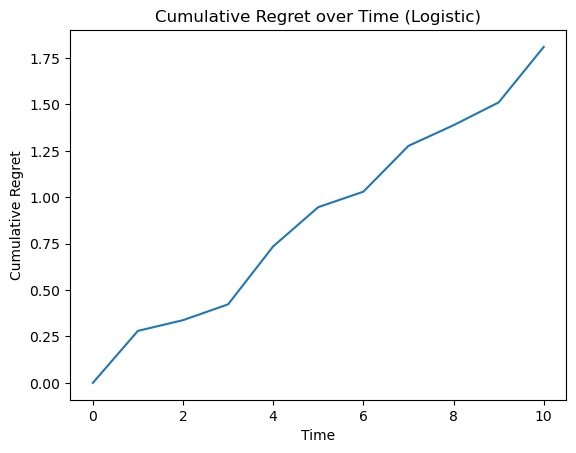

In [2]:
# Initialize the environment
env = environment(dim=5, k=100)
time = 10

# Initialize the bandit algorithm for the linear form
bandit = bandit_TS(form="logistic", T= time, T_init=0, dim=5, k=100)

# Run the bandit algorithm for the specified number of iterations
for t in range(time):
    # Generate contexts at each iteration
    contexts = env.generate_contexts()
    if t % (time / 5) == 0:
        print("t = " + str(t))
    exploration = t < bandit.T_init  # Set exploration to True during the initial rounds
    issue = bandit.one_step(env, exploration)
    if issue:
        print("Error in the bandit algorithm: t = "+ str(t))

# Plot the cumulative regret over time
plt.plot(bandit.regret)
plt.xlabel("Time")
plt.ylabel("Cumulative Regret")
plt.title("Cumulative Regret over Time (Logistic)")
plt.show()


## Linear function Setup

t = 0
t = 200
t = 400
t = 600
t = 800


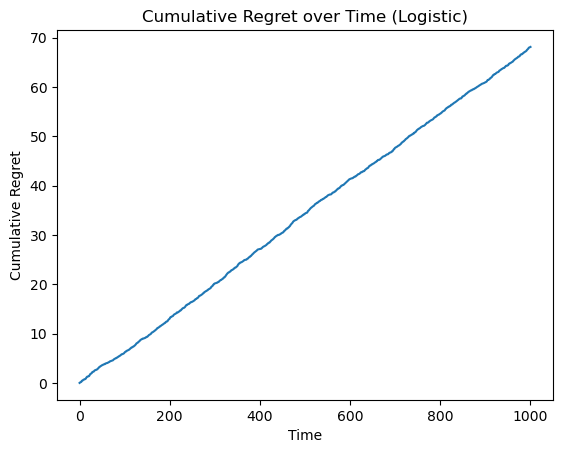

In [3]:
# Initialize the environment
env = linear_environment(dim=5, k=100)
time = 1000

# Initialize the bandit algorithm for the linear form
bandit = bandit_TS(form="linear", T= time, T_init=0, dim=5, k=100)

# Run the bandit algorithm for the specified number of iterations
for t in range(time):
    # Generate contexts at each iteration
    contexts = env.generate_contexts()
    if t % (time / 5) == 0:
        print("t = " + str(t))
    exploration = t < bandit.T_init  # Set exploration to True during the initial rounds
    issue = bandit.one_step(env, exploration)
    if issue:
        print("Error in the bandit algorithm: t = "+ str(t))

# Plot the cumulative regret over time
plt.plot(bandit.regret)
plt.xlabel("Time")
plt.ylabel("Cumulative Regret")
plt.title("Cumulative Regret over Time (Linear)")
plt.show()


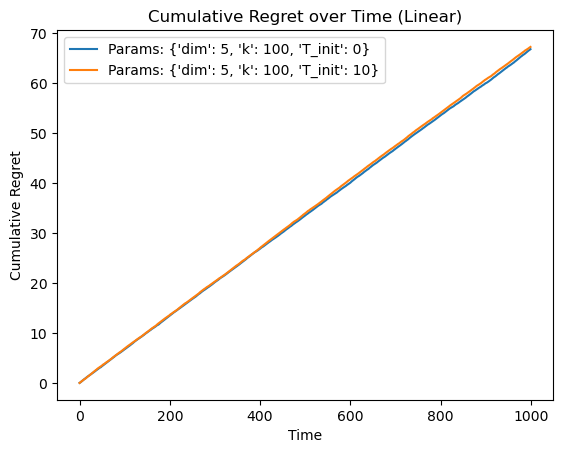

In [5]:
import numpy as np
import matplotlib.pyplot as plt
"""bandit_class: The bandit class to use (e.g. bandit_TS)
env_class: The environment class to use (e.g. linear_environment)
time: Number of time steps to run the experiment
nbr_runs: Number of runs for each set of parameters
param_list: A list of dictionaries containing different sets of parameters to run experiments with
form: The form of the bandit (e.g. "linear")"""
def run_experiments(bandit_class, env_class, time, nbr_runs, param_list, form):
    avg_regrets = []
    for params in param_list:
        cum_regrets = np.zeros(time)
        for run in range(nbr_runs):
            env_params = {k: v for k, v in params.items() if k in env_class.__init__.__code__.co_varnames}
            env = env_class(**env_params)
            bandit = bandit_class(form=form, T=time, **params)

            for t in range(time):
                contexts = env.generate_contexts()
                exploration = t < bandit.T_init
                issue = bandit.one_step(env, exploration)

                if issue:
                    print(f"Error in the bandit algorithm: t = {t}, run = {run}, params = {params}")

            cum_regrets += bandit.regret[:time]

        avg_regret = cum_regrets / nbr_runs
        avg_regrets.append(avg_regret)

    for i, avg_regret in enumerate(avg_regrets):
        plt.plot(avg_regret, label=f"Params: {param_list[i]}")

    plt.xlabel("Time")
    plt.ylabel("Cumulative Regret")
    plt.title(f"Cumulative Regret over Time ({form.capitalize()})")
    plt.legend()
    plt.show()

# Example usage
param_list = [
    {'dim': 5, 'k': 100, 'T_init': 0},
    {'dim': 5, 'k': 100, 'T_init': 10},
]

run_experiments(bandit_TS, linear_environment, time=1000, nbr_runs=10, param_list=param_list, form="linear")
